In [1]:
!python3 -m pip install plotly

In [2]:
import xarray as xr
import os   
import parflow as pf
import plotly.express as px
from parflow.tools.hydrology import calculate_overland_flow_grid, calculate_subsurface_storage
import numpy as np
import shutil
import json

In [3]:
files = json.load(open("/glade/derecho/scratch/bwest/drought-ensemble/domains/wolf/processed_full_runs/ensemble_1/8_year_drought/file_locations.json"))
data = xr.open_mfdataset(files, concat_dim="time", combine="nested")
data.info()
# run_input_data = xr.open_dataset("/glade/derecho/scratch/bwest/drought-ensemble/domains/potomac/raw_runs/31cdd09f9100c787544e94d87002b367950e5a18af33731896690f6343258437/run.out.00000.nc")
# data = xr.open_dataset("/glade/derecho/scratch/bwest/drought-ensemble/domains/potomac/raw_runs/31cdd09f9100c787544e94d87002b367950e5a18af33731896690f6343258437/run.out.00001.nc")

/glade/work/bwest/conda-envs/droughts/lib/python3.11/site-packages/xarray/backends/plugins.py:110: RuntimeWarning: Engine 'cfradial1' loading failed:
No module named 'xarray.core.merge'
  external_backend_entrypoints = backends_dict_from_pkg(entrypoints_unique)
/glade/work/bwest/conda-envs/droughts/lib/python3.11/site-packages/xarray/backends/plugins.py:110: RuntimeWarning: Engine 'furuno' loading failed:
No module named 'xarray.core.merge'
  external_backend_entrypoints = backends_dict_from_pkg(entrypoints_unique)
/glade/work/bwest/conda-envs/droughts/lib/python3.11/site-packages/xarray/backends/plugins.py:110: RuntimeWarning: Engine 'gamic' loading failed:
No module named 'xarray.core.merge'
  external_backend_entrypoints = backends_dict_from_pkg(entrypoints_unique)
ERROR 1: PROJ: proj_create_from_database: Open of /glade/work/bwest/conda-envs/droughts/share/proj failed
/glade/work/bwest/conda-envs/droughts/lib/python3.11/site-packages/xarray/backends/plugins.py:110: RuntimeWarning: 

xarray.Dataset {
dimensions:
	time = 183960 ;
	z = 10 ;
	y = 41 ;
	x = 78 ;

variables:
	float64 pressure(time, z, y, x) ;
	float64 saturation(time, z, y, x) ;
	float64 evaptrans(time, z, y, x) ;
	float64 overland_bc_flux(time, y, x) ;
	float64 mask(time, z, y, x) ;
	float64 mannings(time, y, x) ;
	float64 porosity(time, z, y, x) ;
	float64 specific_storage(time, z, y, x) ;
	float64 DZ_Multiplier(time, z, y, x) ;
	float64 slopex(time, y, x) ;
	float64 slopey(time, y, x) ;
	float64 perm_x(time, z, y, x) ;
	float64 perm_y(time, z, y, x) ;
	float64 perm_z(time, z, y, x) ;
	float64 overland_flow(time, y, x) ;
	float64 subsurface_storage(time, z, y, x) ;
	float64 time(time) ;

// global attributes:
}

In [4]:
# data["mask"] = run_input_data.mask.isel(time=0)
# data["mannings"] = run_input_data.mannings.isel(time=0)
# data["porosity"] = run_input_data.porosity.isel(time=0)
# data["specific_storage"] = run_input_data.specific_storage.isel(time=0)
# data["DZ_Multiplier"] = run_input_data.DZ_Multiplier.isel(time=0)
# data["slopex"] = run_input_data.slopex.isel(time=0)
# data["slopey"] = run_input_data.slopey.isel(time=0)
# data["perm_x"] = run_input_data.perm_x.isel(time=0)
# data["perm_y"] = run_input_data.perm_y.isel(time=0)
# data["perm_z"] = run_input_data.perm_z.isel(time=0)

In [5]:
# def calculate_overland_flow_wrapper( pressure, slopex, slopey, mannings, dx, dy, mask):
#     """Wrapper to make mask a positional argument"""
#     return calculate_overland_flow_grid(pressure, slopex, slopey, mannings, dx, dy, mask=mask)

In [6]:
# overland_flow = xr.apply_ufunc(
#     calculate_overland_flow_wrapper,
#     data.pressure,           # (time, z, y, x)
#     data.slopex,             # (y, x)
#     data.slopey,             # (y, x)
#     data.mannings,           # (y, x)
#     1000,                    # scalar dx
#     1000,                    # scalar dy
#     data.mask,               # (z, y, x)
#     input_core_dims=[['z', 'y', 'x'], ['y', 'x'], ['y', 'x'], ['y', 'x'], [], [], ['z', 'y', 'x']],
#     output_core_dims=[['y', 'x']],
#     vectorize=True
# )
# data["overland_flow"] = overland_flow

In [7]:
# 

In [19]:
# # data = xr.open_dataset("/glade/derecho/scratch/bwest/drought-ensemble/domains/potomac/testing/pro/fc2a5b1d5cf4b8279c7d6a98de84df89f0bc21961f7fd18bac11228fec55ac9c/run.out.00001.nc")
# # data = xr.open_dataset("/glade/derecho/scratch/bwest/drought-ensemble/ensemble_running/output.nc")
# outlet_x = 66
# outlet_y = 135
outlet_x = 18
outlet_y = 21

In [9]:
data.info()

xarray.Dataset {
dimensions:
	time = 183960 ;
	z = 10 ;
	y = 41 ;
	x = 78 ;

variables:
	float64 pressure(time, z, y, x) ;
	float64 saturation(time, z, y, x) ;
	float64 evaptrans(time, z, y, x) ;
	float64 overland_bc_flux(time, y, x) ;
	float64 mask(time, z, y, x) ;
	float64 mannings(time, y, x) ;
	float64 porosity(time, z, y, x) ;
	float64 specific_storage(time, z, y, x) ;
	float64 DZ_Multiplier(time, z, y, x) ;
	float64 slopex(time, y, x) ;
	float64 slopey(time, y, x) ;
	float64 perm_x(time, z, y, x) ;
	float64 perm_y(time, z, y, x) ;
	float64 perm_z(time, z, y, x) ;
	float64 overland_flow(time, y, x) ;
	float64 subsurface_storage(time, z, y, x) ;
	float64 time(time) ;

// global attributes:
}

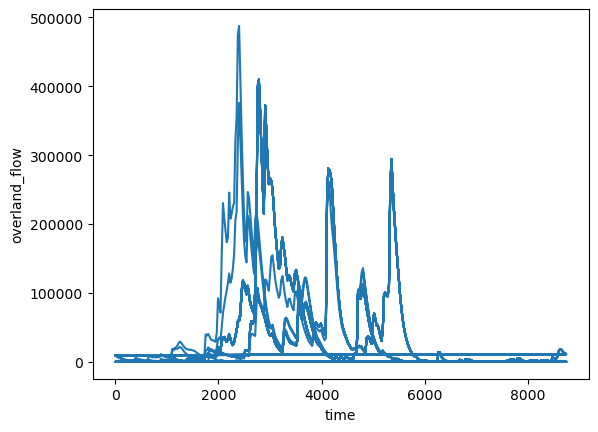

In [ ]:
# # plot the overland_flow at the outlet for time > 24
data.overland_flow.isel(time=slice(24, None, 24)).isel(x=outlet_x, y=outlet_y).plot.line()
# px.imshow(data.overland_flow.isel(time=10))



In [11]:
# data.info()
# # mask = pf.read_pfb("/glade/derecho/scratch/bwest/drought-ensemble/domains/potomac/inputs/potomac_average/mask.pfb")

# # px.imshow(mask[0,:,:])

In [12]:
# # plot the overland_bc_flux at time = 0
# (data.overland_bc_flux.isel(time=0)*mask[0,:,:]).plot()


In [13]:
# 